## Chapter 02. Finding and Handling Time-Series Data

### 2.2.1 시계열 데이터 집합 조립하기

In [7]:
import pandas as pd
import numpy as np

YearJoined = pd.read_csv('./data/year_joined.csv')
YearJoined.groupby('user').count().groupby('userStats').count()

,yearJoined
userStats,
1,1000


In [4]:
emails = pd.read_csv('./data/emails.csv')
emails

,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00
4,1.0,1.0,2015-08-03 00:00:00
...,...,...,...
25483,3.0,998.0,2018-04-30 00:00:00
25484,3.0,998.0,2018-05-07 00:00:00
25485,3.0,998.0,2018-05-14 00:00:00
25486,3.0,998.0,2018-05-21 00:00:00


In [6]:
# set을 사용해 각 열의 유니크한 값 목록을 만듦
complete_idx = pd.MultiIndex.from_product((set(emails.week), set(emails.user)))

# 재색인 메서드 : reindex
# 색인 재설정 메서드 : reset_index
all_email = emails.set_index(['week', 'user']).reindex(complete_idx, fill_value=0).reset_index()
all_email.columns = ['week', 'user', 'emailsOpened']

In [10]:
len(set(emails.week)), len(set(emails.user))

(173, 539)

In [9]:
complete_idx

MultiIndex([('2015-12-14 00:00:00',   1.0),
            ('2015-12-14 00:00:00',   3.0),
            ('2015-12-14 00:00:00',   5.0),
            ('2015-12-14 00:00:00',   6.0),
            ('2015-12-14 00:00:00',   9.0),
            ('2015-12-14 00:00:00',  10.0),
            ('2015-12-14 00:00:00',  14.0),
            ('2015-12-14 00:00:00',  16.0),
            ('2015-12-14 00:00:00',  20.0),
            ('2015-12-14 00:00:00',  21.0),
            ...
            ('2016-08-29 00:00:00', 973.0),
            ('2016-08-29 00:00:00', 977.0),
            ('2016-08-29 00:00:00', 982.0),
            ('2016-08-29 00:00:00', 984.0),
            ('2016-08-29 00:00:00', 987.0),
            ('2016-08-29 00:00:00', 991.0),
            ('2016-08-29 00:00:00', 992.0),
            ('2016-08-29 00:00:00', 993.0),
            ('2016-08-29 00:00:00', 995.0),
            ('2016-08-29 00:00:00', 998.0)],
           length=93247)

In [11]:
all_email

,week,user,emailsOpened
0,2015-12-14 00:00:00,1.0,0.0
1,2015-12-14 00:00:00,3.0,0.0
2,2015-12-14 00:00:00,5.0,0.0
3,2015-12-14 00:00:00,6.0,0.0
4,2015-12-14 00:00:00,9.0,0.0
...,...,...,...
93242,2016-08-29 00:00:00,991.0,0.0
93243,2016-08-29 00:00:00,992.0,0.0
93244,2016-08-29 00:00:00,993.0,0.0
93245,2016-08-29 00:00:00,995.0,0.0


In [13]:
# 최초 이메일 열람 시전 이후의 0 삭제
cutoff_dates = emails.groupby('user').week.agg(['min','max']).reset_index()
cutoff_dates = cutoff_dates.reset_index()

for _, row in cutoff_dates.iterrows():
	user = row['user']
	start_date = row['min']
	end_date = row['max']

# start_date 이전의 주에 대한 내용을 삭제
all_email.drop(all_email[all_email.user == user]
												[all_email.week < start_date].index, inplace=True)
# end_date 이후의 주에 대한 내용을 삭제
all_email.drop(all_email[all_email.user == user]
												[all_email.week > end_date].index, inplace=True)

C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\876071827.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.user == user]
C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\876071827.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.user == user]


In [14]:
all_email

,week,user,emailsOpened
0,2015-12-14 00:00:00,1.0,0.0
1,2015-12-14 00:00:00,3.0,0.0
2,2015-12-14 00:00:00,5.0,0.0
3,2015-12-14 00:00:00,6.0,0.0
4,2015-12-14 00:00:00,9.0,0.0
...,...,...,...
93241,2016-08-29 00:00:00,987.0,1.0
93242,2016-08-29 00:00:00,991.0,0.0
93243,2016-08-29 00:00:00,992.0,0.0
93244,2016-08-29 00:00:00,993.0,0.0


### 2.2.2 발견된 시계열을 구성하기

In [23]:
donations = pd.read_csv('./data/donations.csv')
donations

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0
...,...,...,...
2671,25.0,2016-09-02 11:20:00,992.0
2672,50.0,2017-11-02 12:17:06,993.0
2673,1000.0,2016-09-13 21:09:47,995.0
2674,1000.0,2017-09-29 20:03:01,995.0


In [24]:
# 판다스에 내장된 날짜 관련 색인 기능을 사용하여 문자열을 타임스탬프에 적절한 데이터로 변환
donations['timestamp'] = pd.to_datetime(donations['timestamp'])
donations.set_index('timestamp', inplace=True)

# 각 회원의 부분집합에 대한 데이터 프레임
# 주 단위로 그룹화하여 기부금 총액을 구하고, 기부가 없는 주는 삭제
agg_don = donations.groupby('user').apply(
												lambda df: df.amount.resample('W-MON').sum().dropna()) # 주를 '월요일'로 고정한 다음 재배열

In [26]:
donations.head()

,amount,user
timestamp,,
2017-11-12 11:13:44,25.0,0.0
2015-08-25 19:01:45,50.0,0.0
2015-03-26 12:03:47,25.0,0.0
2016-07-06 12:24:55,50.0,0.0
2016-05-11 18:13:04,50.0,1.0


In [42]:
agg_don = agg_don.reset_index()

In [45]:
for user, user_email in all_email.groupby('user'):
    	# 특정 회원의 기부 데이터를 추출
	user_donations = agg_don[agg_don.user == user]

	# 기부 데이터의 색인을 timestamp로 설정
	user_donations.set_index('timestamp', inplace=True)
	user_email.set_index('week', inplace=True)

	user_email = all_email[all_email.user == user]
	user_email.sort_values('week').set_index('week')
	merged_df = pd.merge(user_email, user_donations, how = 'left',
											left_index = True,
											right_index = True)
	merged_df.fillna(0)
	merged_df['user'] = merged_df.user_x
	merged_df = merged_df.append(df.reset_index()[['user','week','emailsOpened','amount']])

C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\1326759866.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df.reset_index()[['user','week','emailsOpened','amount']])
C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\1326759866.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df.reset_index()[['user','week','emailsOpened','amount']])
C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\1326759866.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df.reset_index()[['user','week','emailsOpened','amount']])
C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\1326759866.py:16: FutureWarning: The frame.append method is deprecated and wi

In [47]:
merged_df.head()

,week,user_x,emailsOpened,user_y,amount,user
6467,2018-05-14 00:00:00,998.0,3.0,NaN,NaN,998.0
8084,2018-04-23 00:00:00,998.0,0.0,NaN,NaN,998.0
9701,2018-02-26 00:00:00,998.0,2.0,NaN,NaN,998.0
14013,2018-04-16 00:00:00,998.0,3.0,NaN,NaN,998.0
15091,2018-03-12 00:00:00,998.0,3.0,NaN,NaN,998.0


In [49]:
df = merged_df[merged_df.user == 998]
df

,week,user_x,emailsOpened,user_y,amount,user
6467,2018-05-14 00:00:00,998.0,3.0,NaN,NaN,998.0
8084,2018-04-23 00:00:00,998.0,0.0,NaN,NaN,998.0
9701,2018-02-26 00:00:00,998.0,2.0,NaN,NaN,998.0
14013,2018-04-16 00:00:00,998.0,3.0,NaN,NaN,998.0
15091,2018-03-12 00:00:00,998.0,3.0,NaN,NaN,998.0
18864,2018-05-28 00:00:00,998.0,3.0,NaN,NaN,998.0
21020,2018-01-08 00:00:00,998.0,3.0,NaN,NaN,998.0
26410,2018-05-07 00:00:00,998.0,3.0,NaN,NaN,998.0
28027,2018-03-19 00:00:00,998.0,2.0,NaN,NaN,998.0
33417,2017-12-25 00:00:00,998.0,0.0,NaN,NaN,998.0


In [50]:
df['target'] = df.amount.shift(1)
df = df.fillna(0)
df

C:\Users\lucky\AppData\Local\Temp\ipykernel_25228\1830522143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.amount.shift(1)


,week,user_x,emailsOpened,user_y,amount,user,target
6467,2018-05-14 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
8084,2018-04-23 00:00:00,998.0,0.0,0.0,0.0,998.0,0.0
9701,2018-02-26 00:00:00,998.0,2.0,0.0,0.0,998.0,0.0
14013,2018-04-16 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
15091,2018-03-12 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
18864,2018-05-28 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
21020,2018-01-08 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
26410,2018-05-07 00:00:00,998.0,3.0,0.0,0.0,998.0,0.0
28027,2018-03-19 00:00:00,998.0,2.0,0.0,0.0,998.0,0.0
33417,2017-12-25 00:00:00,998.0,0.0,0.0,0.0,998.0,0.0


In [51]:
df.drop(['user_x', 'user_y'], axis=1, inplace=True)
df

,week,emailsOpened,amount,user,target
6467,2018-05-14 00:00:00,3.0,0.0,998.0,0.0
8084,2018-04-23 00:00:00,0.0,0.0,998.0,0.0
9701,2018-02-26 00:00:00,2.0,0.0,998.0,0.0
14013,2018-04-16 00:00:00,3.0,0.0,998.0,0.0
15091,2018-03-12 00:00:00,3.0,0.0,998.0,0.0
18864,2018-05-28 00:00:00,3.0,0.0,998.0,0.0
21020,2018-01-08 00:00:00,3.0,0.0,998.0,0.0
26410,2018-05-07 00:00:00,3.0,0.0,998.0,0.0
28027,2018-03-19 00:00:00,2.0,0.0,998.0,0.0
33417,2017-12-25 00:00:00,0.0,0.0,998.0,0.0


In [52]:
df.head()

,week,emailsOpened,amount,user,target
6467,2018-05-14 00:00:00,3.0,0.0,998.0,0.0
8084,2018-04-23 00:00:00,0.0,0.0,998.0,0.0
9701,2018-02-26 00:00:00,2.0,0.0,998.0,0.0
14013,2018-04-16 00:00:00,3.0,0.0,998.0,0.0
15091,2018-03-12 00:00:00,3.0,0.0,998.0,0.0


In [53]:
len(df)

26

#### 2.4.1 누락된 데이터 다루기

In [72]:
unemp = pd.read_csv('./data/UNRATE.csv')
unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


In [52]:
# 임의로 누락된 데이터셋 생성
import random
import numpy as np

rand_nums = np.random.randint(0, 844, size=100)
unemp_random = unemp.copy()

In [53]:
# 바꿔지지 않음 ...
unemp_random.loc[rand_nums]['UNRATE'] = np.nan * len(rand_nums)

In [54]:
# 원하는 인덱스 위치의 필드 값을 바꾸는 방법
unemp_random.loc[rand_nums, 'UNRATE'] = np.nan

In [55]:
# 실업률이 높을 때 누락될 가능성이 더 높은 데이터셋을 생성
unemp_high = unemp.copy()
unemp_high['UNRATE'].describe()

count    844.000000
mean       5.781517
std        1.635299
min        2.500000
25%        4.600000
50%        5.600000
75%        6.825000
max       10.800000
Name: UNRATE, dtype: float64

In [56]:
# 생성 완료
unemp_high['UNRATE'] = np.where(unemp_high['UNRATE'] > 8, np.nan, unemp_high['UNRATE'])

In [57]:
# 포워드필
unemp_random.fillna(method='ffill')

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


In [82]:
unemp['DATE'] = pd.to_datetime(unemp['DATE'])

In [96]:
unemp['DATE'] = unemp['DATE'].apply(lambda x: x.year)

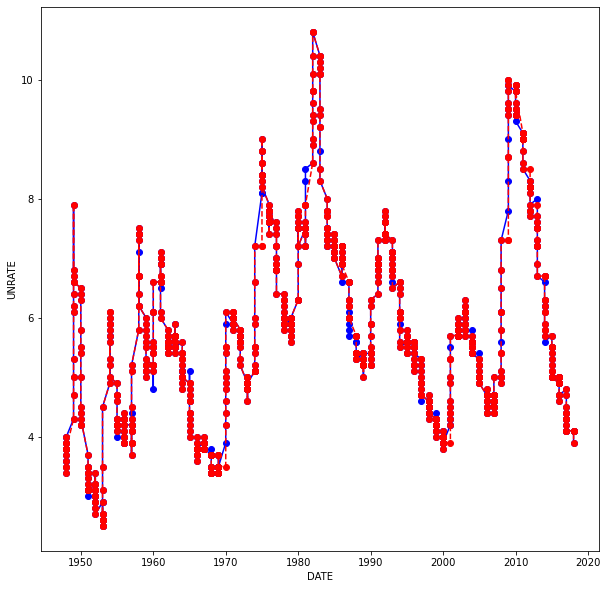

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(unemp['DATE'],unemp['UNRATE'], 'bo-')
plt.plot(pd.to_datetime(unemp_random['DATE']).apply(lambda x : x.year), unemp_random.fillna(method='ffill')['UNRATE'], 'ro--')
plt.ylabel('UNRATE')
plt.xlabel('DATE')
plt.show()

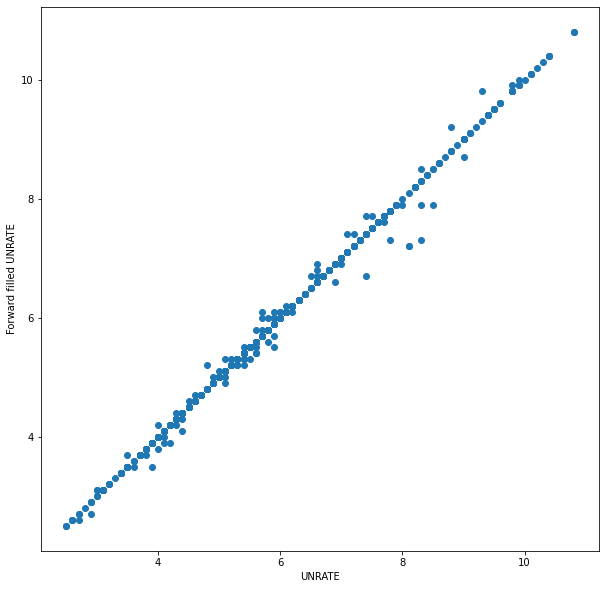

In [109]:
plt.figure(figsize=(10, 10))
plt.plot(unemp['UNRATE'], unemp_random.fillna(method='ffill')['UNRATE'], 'o')
plt.xlabel('UNRATE')
plt.ylabel('Forward filled UNRATE')
plt.show()

In [114]:
# 이동평균
result = unemp_random['UNRATE'].rolling(3)
result

Rolling [window=3,center=False,axis=0,method=single]

In [115]:
result.mean()

0           NaN
1           NaN
2      3.733333
3      3.900000
4      3.800000
         ...   
839    4.100000
840    4.100000
841    4.100000
842    4.100000
843    4.033333
Name: UNRATE, Length: 844, dtype: float64

In [156]:
# 보간법
from scipy import interpolate

# x = pd.to_datetime(unemp_random['DATE']).apply(lambda x : x.year)
x = np.arange(0, len(unemp_random))
y = unemp_random['UNRATE']

f_linear = interpolate.interp1d(x, y, kind='linear')
f_linear

In [157]:
y_new = f_linear(x)

In [158]:
y_new

array([ 3.4,  3.8,  4. ,  3.9,  3.5,  nan,  nan,  3.9,  3.8,  3.7,  3.8,
        nan,  nan,  4.7,  5. ,  5.3,  6.1,  6.2,  6.7,  6.8,  6.6,  7.9,
        6.4,  6.6,  6.5,  6.4,  6.3,  5.8,  5.5,  5.4,  5. ,  4.5,  4.4,
        4.2,  4.2,  4.3,  3.7,  3.4,  3.4,  3.1,  nan,  nan,  3.1,  3.1,
        3.3,  3.5,  3.5,  3.1,  3.2,  3.1,  2.9,  2.9,  3. ,  3. ,  3.2,
        3.4,  3.1,  nan,  nan,  2.7,  2.9,  2.6,  2.6,  nan,  nan,  2.5,
        2.6,  2.7,  nan,  nan,  3.5,  4.5,  4.9,  5.2,  5.7,  5.9,  5.9,
        5.6,  5.8,  6. ,  6.1,  nan,  nan,  5. ,  4.9,  4.7,  4.6,  4.7,
        4.3,  4.2,  nan,  nan,  4.1,  4.3,  4.2,  4.2,  4. ,  3.9,  4.2,
        4. ,  4.3,  nan,  nan,  4.1,  3.9,  3.9,  4.3,  4.2,  nan,  nan,
        3.7,  3.9,  nan,  nan,  4.2,  4.1,  nan,  nan,  5.1,  5.2,  5.8,
        6.4,  6.7,  nan,  nan,  7.3,  7.5,  7.4,  nan,  nan,  6.2,  6.2,
        6. ,  5.9,  5.6,  5.2,  5.1,  5. ,  5.1,  5.2,  5.5,  5.7,  5.8,
        5.3,  5.2,  nan,  nan,  5.2,  5.1,  5.4,  5

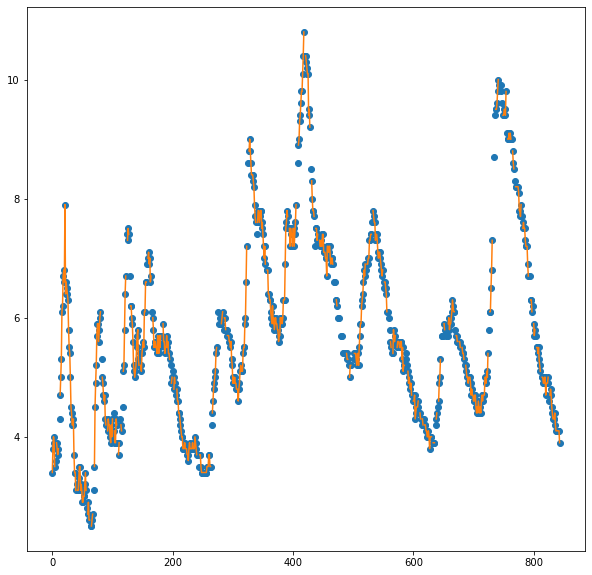

In [159]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, "o", x, y_new, '-')
plt.show()

In [150]:
unemp_random.isna().sum()

DATE       0
UNRATE    96
dtype: int64

#### 2.4.2 업샘플링과 다운샘플링

In [162]:
unemp = pd.read_csv('./data/UNRATE.csv')
unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


In [165]:
# 월 단위로 구분된 원본 시계열에 다운샘플링을 적용해 1월에 측정된 것에만 집중
unemp['month'] = unemp['DATE'].apply(lambda x : x[5:7])
unemp[unemp['month']=='01']

,DATE,UNRATE,month
0,1948-01-01,3.4,01
12,1949-01-01,4.3,01
24,1950-01-01,6.5,01
36,1951-01-01,3.7,01
48,1952-01-01,3.2,01
...,...,...,...
792,2014-01-01,6.6,01
804,2015-01-01,5.7,01
816,2016-01-01,4.9,01
828,2017-01-01,4.8,01


In [166]:
unemp['year'] = unemp['DATE'].apply(lambda x : x[:4])
unemp.groupby('year').mean()

,UNRATE
year,
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
...,...
2014,6.175000
2015,5.266667
2016,4.866667
